In [72]:
# Run this cell if you don't have the following libraries installed
!pip3 install pandas
!pip3 install matplotlib
!pip3 install seaborn


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip


In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Task 1

When I did this task I ran into some issues dowloading the dataset. After a few minutes I realized that the newest version of xlrd was no longer compatible with .xls files so I decided to change the format of the file to .xlsx to load it. I decided to do since I was struggling to download an old version of xlrd. 

In [27]:
df = pd.read_excel("titanic3.xlsx")

Using describe() was very commmon in our other courses, so I dedicided to give it a try to get a few details of the dataframe (count, mean, min/max, etc)

In [28]:
print(df.describe())

            pclass     survived          age        sibsp        parch  \
count  1309.000000  1309.000000  1046.000000  1309.000000  1309.000000   
mean      2.294882     0.381971    29.881135     0.498854     0.385027   
std       0.837836     0.486055    14.413500     1.041658     0.865560   
min       1.000000     0.000000     0.166700     0.000000     0.000000   
25%       2.000000     0.000000    21.000000     0.000000     0.000000   
50%       3.000000     0.000000    28.000000     0.000000     0.000000   
75%       3.000000     1.000000    39.000000     1.000000     0.000000   
max       3.000000     1.000000    80.000000     8.000000     9.000000   

              fare        body  
count  1308.000000  121.000000  
mean     33.295479  160.809917  
std      51.758668   97.696922  
min       0.000000    1.000000  
25%       7.895800   72.000000  
50%      14.454200  155.000000  
75%      31.275000  256.000000  
max     512.329200  328.000000  


After getting the results of describe(), I realized that it isn't that helpful so I decided to use another method info(). 

In [29]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB
None


This method was more helpful since it helped me with a bit more information about the dataset. We know now that there are 1309 entries, which is a manageable amount of data to practice ML. We also know that there are 14 columns per entry of which 7 are categorical (which we will have to encode later on) and 7 are numerical. It also provides information about the null values present in each column. Since we have 1309 entires then pclass, survived, name, sex, sibsp, parch, and ticket columns are the only ones that have no missing values. We will just keep in this in mind for now and address this in the next task.

Now I will move on to some visualizations for numerical columns. 

[[<Axes: title={'center': 'pclass'}> <Axes: title={'center': 'survived'}>
  <Axes: title={'center': 'age'}>]
 [<Axes: title={'center': 'sibsp'}> <Axes: title={'center': 'parch'}>
  <Axes: title={'center': 'fare'}>]
 [<Axes: title={'center': 'body'}> <Axes: > <Axes: >]]


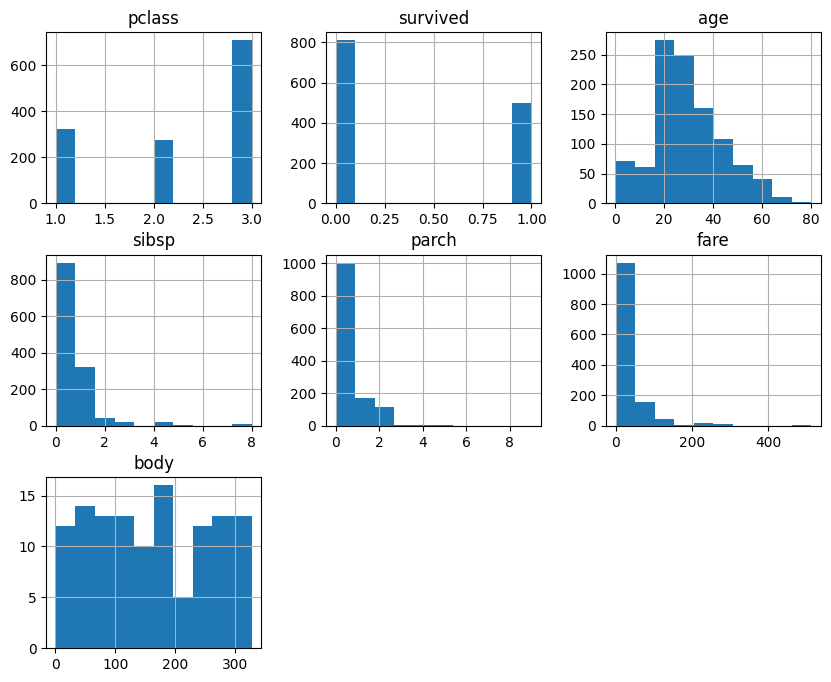

In [30]:
print(df.hist(figsize=(10,8)))

So these histograms gives us a quick insight on each of the columns. For the pclass column it is clear that there much more people from the third class than the first and second classes. The survived column tells us that there are about 800 people that didn't survive, which is much more than those approximately 500 that did. As we previously saw with describe(), passengers' mean age was around 29-30. This means that there were more young adults and kids than there were old adults (right skewed). Majority of the passengers didn't have any companions on-board, some had one companion (probably spouses), and very few had families on-board (few outliers). Again, the enxt histogram tells us that majority of passengers did not have any parents or children on-board. Majority of passengers paid low fares, which we already knew since majority of passengers were traveling in third class, still, there a few who paid much more. Finally, the last histogram is not relevant since this is the column that just tells us the number of the found bodies. 


These histograms provided useful information about skewness and outliers, which we will have to deal with in later tasks. Nevertheless, the histograms provided information on individual variables. Now I want to get information on relationships, specifically the survival rates across the different numerical columns. I will use a barplot for easy analysis. 

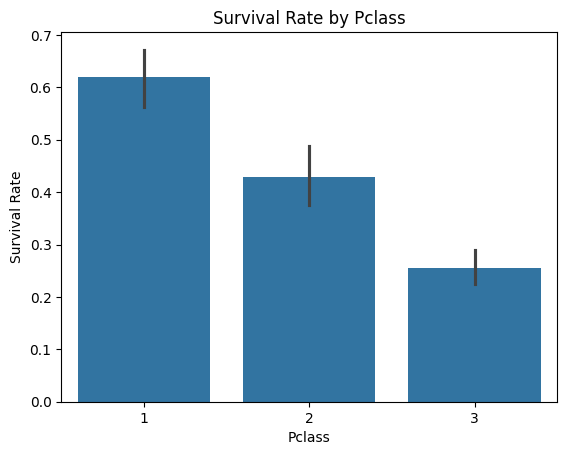

In [40]:
sns.barplot(x="pclass", y="survived", data=df)
plt.xlabel("Pclass")
plt.ylabel("Survival Rate")
plt.title("Survival Rate by Pclass")
plt.show()

In [53]:
# I will create a copy to avoid modifying the original dataset since I am just exploring for now
df_copy = df.copy()

pclass_counts = df_copy.groupby('pclass')['survived'].agg(['count', 'mean'])
print(pclass_counts)

        count      mean
pclass                 
1         323  0.619195
2         277  0.429603
3         709  0.255289


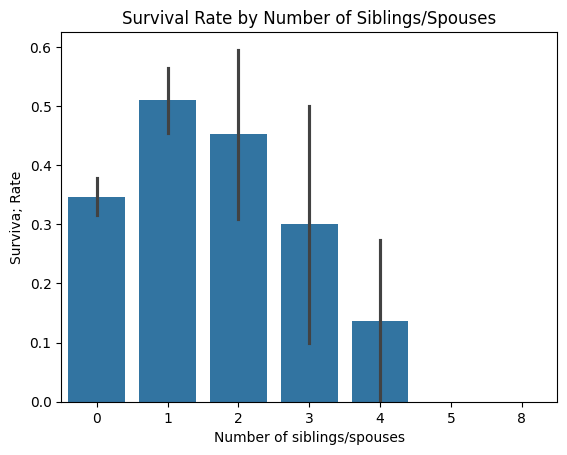

In [41]:
sns.barplot(x="sibsp", y="survived", data=df)
plt.xlabel("Number of siblings/spouses")
plt.ylabel("Surviva; Rate")
plt.title("Survival Rate by Number of Siblings/Spouses")
plt.show()

In [52]:
sibsp_counts = df_copy.groupby('sibsp')['survived'].agg(['count', 'mean'])
print(sibsp_counts)

       count      mean
sibsp                 
0        891  0.346801
1        319  0.510972
2         42  0.452381
3         20  0.300000
4         22  0.136364
5          6  0.000000
8          9  0.000000


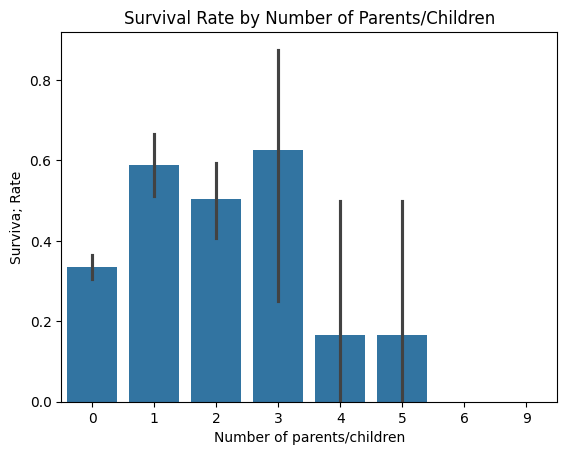

In [42]:
sns.barplot(x="parch", y="survived", data=df)
plt.xlabel("Number of parents/children")
plt.ylabel("Surviva; Rate")
plt.title("Survival Rate by Number of Parents/Children")
plt.show()

In [56]:
parch_counts = df_copy.groupby('parch')['survived'].agg(['count', 'mean'])
print(parch_counts)

       count      mean
parch                 
0       1002  0.335329
1        170  0.588235
2        113  0.504425
3          8  0.625000
4          6  0.166667
5          6  0.166667
6          2  0.000000
9          2  0.000000


The most relevant relationship I found was the survival rate by class. As one could've guessed, the survival rate in the first class is much higher than the one in the third class. The barplot shows a clear relationship, the higher the class the higher the survival rate. While the survival rate of those passengers in the first class is about 60%, the survival rate of those passengers in the second class is less than 30%... crazy! Knowing that there are much more passengers from the third class in the dataset, it is intuitive that not many passengers survived.
 
 Additionally, I also decided to visualize the survivial rate by number of siblings/spouses. The results seem to make sense since being completely alone had a lower surival rate than having one companion on-board, and having more that 1 companion decreased the surivival rate. 
  
This goes hand in hand with the relationship with the number of parents/children. Most passengers had 0 to 2 parents/children on board, and even though the graph shows that the survival rate increased when the number of parch was 3 we need to consider that this was the case for only 8 passengers. Therefore, we can once again conclude that having 1 companion gave passengers more chance to survive than being alone but having more that 1 companion decreased their chances.

I want to further analyze the relationships with the other relevant columns so we have to find a way to group the data and graph it. We will graph the relationships between survival rate and age and fare since the relationhsip with found bodies is not relevant.

/var/folders/qs/b6gl60rs5p720hcg1ll48zqh0000gn/T/ipykernel_35425/848179370.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival_rate = df_copy.groupby('age_group')['survived'].mean()


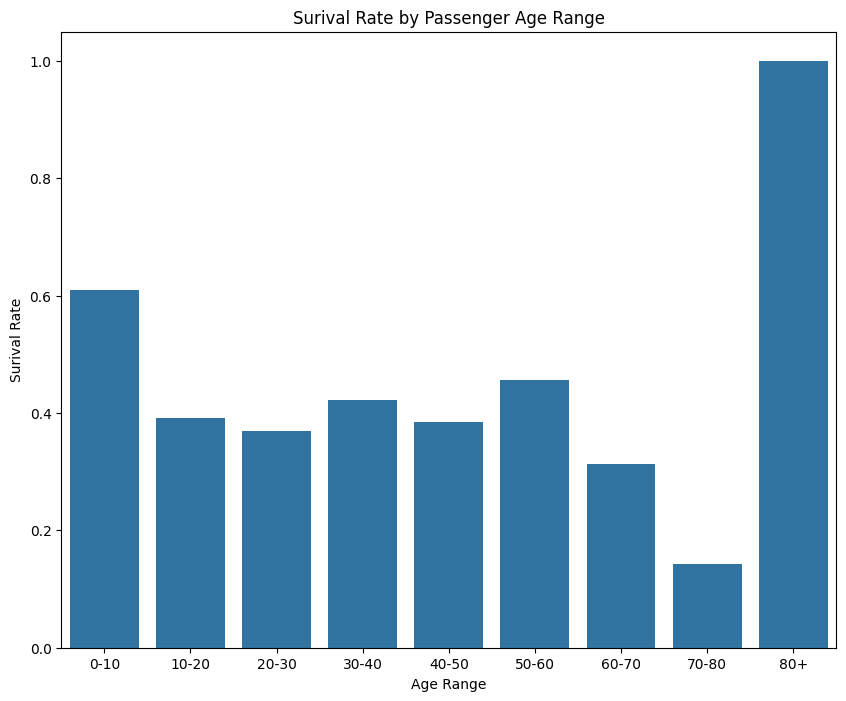

In [66]:
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, df['age'].max() + 1]
age_ranges = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80+']

df_copy['age_group'] = pd.cut(df_copy['age'], bins=age_bins, labels=age_ranges, right=False)

age_survival_rate = df_copy.groupby('age_group')['survived'].mean()

plt.figure(figsize =(10,8))
sns.barplot(x=age_survival_rate.index, y=age_survival_rate.values)

plt.title("Surival Rate by Passenger Age Range")
plt.xlabel("Age Range")
plt.ylabel("Surival Rate")

plt.show()


It seems odd that kids have such a high survival rate and that elderly have a 100% of survival rate, so I want to check how many passengers fall in each age group. This is helpful because if there were 5 people that were 80+ years old and all 5 happened to survive then of course the survival rate is going to be 100%. (I will also go back to the previous plots and add the count per section as well)

In [71]:
age_group_counts = df_copy.groupby('age_group')['survived'].agg(['count', 'mean'])
print(age_group_counts)

           count      mean
age_group                 
0-10          82  0.609756
10-20        143  0.391608
20-30        344  0.369186
30-40        232  0.422414
40-50        135  0.385185
50-60         70  0.457143
60-70         32  0.312500
70-80          7  0.142857
80+            1  1.000000


/var/folders/qs/b6gl60rs5p720hcg1ll48zqh0000gn/T/ipykernel_35425/4253456302.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_counts = df_copy.groupby('age_group')['survived'].agg(['count', 'mean'])


The results make the graph much more clear. I made an assumption earlier that kids had a lower change of survival but even though the sample is still small, 82, it make sense that babies/kids had a higher survival rate since their safety was probably prioritized. Additionally, we should disregard the age group 80+ since there is only one sample. 
In conclusion, there seems to be a relationship between age and survival rate, yet, it is a non-linear relationship. Kids/babies had a higher chance of survival, elderly had a lower chance of survival, while middle-aged passengers had a survival rate between ~37% and ~ 46%. The sample sizes per age group are small so we should be careful drawing strict conclusions.

Now moving on with graphing the relationship between survival rate and fares. Hopefully there is a relationship similar to the one we got with passenger classes since fare prices determine the class. We will also print the number of passengers in each fare range to be able to anaylze accordingly.

In [62]:
# First I need to find min and max fares to know how to split the bins

min_fare = df['fare'].min()
max_fare = df['fare'].max()

print("Min Fare:", min_fare)
print("Max Fare:", max_fare)

Min Fare: 0.0
Max Fare: 512.3292


/var/folders/qs/b6gl60rs5p720hcg1ll48zqh0000gn/T/ipykernel_35425/4195619959.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fare_survival_rate = df_copy.groupby('fare_group')['survived'].mean()


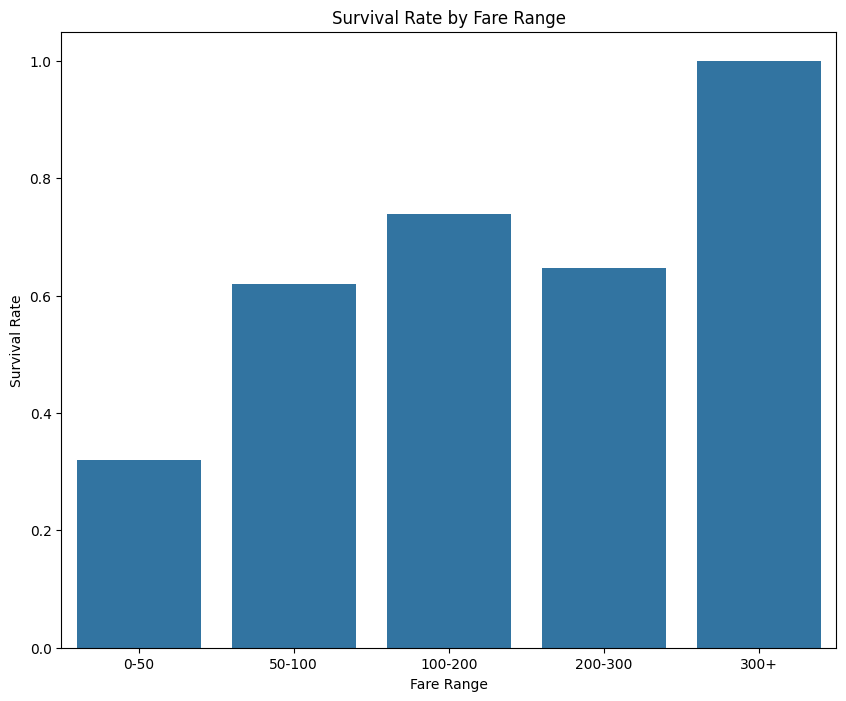

In [60]:
# Now that we know the min and max we can split the bins accordingly

fare_bins = [0, 50, 100, 200, 300, 512.33]
fare_ranges = ['0-50', '50-100', '100-200', '200-300', '300+']


df_copy['fare_group'] = pd.cut(df_copy['fare'], bins=fare_bins, labels=fare_ranges, right=False)

fare_survival_rate = df_copy.groupby('fare_group')['survived'].mean()


plt.figure(figsize=(10, 8))
sns.barplot(x=fare_survival_rate.index, y=fare_survival_rate.values)
plt.title("Survival Rate by Fare Range")
plt.xlabel("Fare Range")
plt.ylabel("Survival Rate")

plt.show()


In [63]:
fare_group_counts = df_copy.groupby('fare_group')['survived'].agg(['count', 'mean'])
print(fare_group_counts)

            count      mean
fare_group                 
0-50         1066  0.320826
50-100        158  0.620253
100-200        46  0.739130
200-300        34  0.647059
300+            4  1.000000


/var/folders/qs/b6gl60rs5p720hcg1ll48zqh0000gn/T/ipykernel_35425/1676248467.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fare_group_counts = df_copy.groupby('fare_group')['survived'].agg(['count', 'mean'])


Based on the results it seems that there is a positive relationship between fare range and survival rate (which is what we expected!), except that the fare range between 200 and 300 has a higher survival rate that the fare range between 100 and 200. Again, the sample sizes are small so we shouldn't draw strict conclusions. 

# Task #1 Summary

Numerical parameters 

- survival rate vs pclass --> the higher the class (1, being the highest and 3 being the lowest), the higher the survival rate

- survival rate vs age --> non-linear relationship, kids/babies have the highest survival rate 

- surival rate vs sibsp --> having 1 companion increases your chances of survival from 0 companions, but having more than one decreases it. 

- surival rate vs parch --> having 1 companion increases your chances of survival from 0 companions, but having more than one decreases it (in the graph it shows that having 3 companions has the highest survival rate but the sample size is very small)

- survival rate vs fare --> positive relationship, the higher the fare, the higher the chances of survival

Categorical parameters
- 

## Task 2

When I used info() it already provided me with the number of non-null values per column, but we can further analyze this to get a clearer idea of the missing values. We will now use isnull() and sum() so we get the number of missing values instead of having to subtract the non-null values from the total number of entries per column.

In [75]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

age           263
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64


The isnull() function now clearly states the number of null values per column. As we already knew, there are 7 columns that have null values. The columns that have the most missing values are the cabin and, boat, and body columns. This makes sense since most passengers that were assigned cabins belonged to the first class (so missing cabin likely refer to third class passengers), only survivors had boats, and only non-survivors had bodies to be found. To further analyze what strategy to use for the missing values it will be useful to know the percentage of missing values per column.

In [76]:
missing_values_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_values_percentage[missing_values_percentage > 0])

age          20.091673
fare          0.076394
cabin        77.463713
embarked      0.152788
boat         62.872422
body         90.756303
home.dest    43.086325
dtype: float64


Considering there are several strategies that could be applied to handle missing values and that there is no way of knowing which is the best technique until after model validation, we have to make an educated guess by anaylzing the previous data anaylysis be made of each column. 

Before doing that I want to think about wether or not we should drop or not the columns with missing values. 
- age: This column is relevant due to a possible relationship with survival rate as we saw before in task #1. Therfore, we should not drop this column. 

- fare: This column is relevant due to a possible relation but it does go hand in hand with pclass so maybe it is a bit redundant. We can keep for now.

- cabin: This column is relevant since the cabin probably tells us the class the passengers belonged too, but again it could be redundant. It would be more helpful if we had more information on where the cabins were located. Addtionally, 77% of the entries are missing so we can drop it.

- embarked: This column could give us further insights and there not even 1% of missing values so we can keep it for now.

- boat: This columns is not relevant since the survival column already tells us if the passenger survived, and since boats are only for those who survived it won't help us. We should drop it.

- body: Again, this column is not relevant. If a passenger's body is found it won't help us determine if a passenger will survive or not. We should drop it. 

- home.dest: There is little potential this is helpful, but there is a possibility the passenger's background connects to their possibilities of survival so we can keep it for now. 




Now we that we analyzed the columns that we can drop we can move on to data imputation (Quick Note: if the data was much larger, we could consider getting rid of the entries with missing values. But, our dataset is not only not large enough, but some of the columns are meant to have missing values, like the body and boat columns. So, we will keep them and handle them instead). 

- age: The distribution across age in this dataset follows an approximate normal distibution (according to the graph in task #1). Therefore, I believe that a good data imputation technique would be using the mean or median. I prefer to use the median just to be a bit safer since the mean might be a bit less robust. 

- fare: Considering that most passengers paid low fares, we can use the mean so that we don't mess with the skewness. I prefer to use the mean over the median since the distribution is not normal. Besides, there are very few missing values. 

- embarked: Since this column is categorical, we can't use the techniques we've been looking at. Nevertheless, considering that there are few missing values, we can just use the mode to fill in. 

- home.dest: This is another categorical column, so we can also use the mode. 

## Task 3

## Task 4

## Task 5

## Task 6

## Task 7

## Task 8